In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/clean.csv")
df

,SEX,AGES,ADMISSION MODE,CGPA - 1,CGPA - 2,CLUB / DEPARTMENT,BOARD STUDIED,DAYS SINCE LAST SHOWER,TREATS GIVEN,HAS A S/O ?,ATTENDS LECTURES,CHARACTER,PIZZERIA EXPENDITURE (annual),GRAMS / MONTH,GPL
0,male,19.0,BITSAT,8.85,7.0,NaN,CBSE,12,4,True,False,LITE,20495,5.00,False
1,female,21.0,DASA,7.01,9.0,NaN,ICSE,1,1,True,False,GHOT,2361,0.20,True
2,female,20.0,BITSAT,3.00,8.0,NaN,CBSE,5,4,True,False,GHOT,8548,0.30,True
3,female,21.0,DASA,6.45,7.0,NaN,CBSE,7,4,True,False,GHOT,4086,0.20,True
4,male,21.0,BITSAT,5.65,9.0,NaN,CBSE,7,3,True,False,LITE,13767,8.50,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,male,19.0,BOARD TOPPER,6.02,3.0,NaN,CBSE,6,0,False,False,GHOT,13166,3.90,False
1086,female,24.0,BOARD TOPPER,3.57,6.0,NaN,CBSE,5,2,False,False,GHOT,5619,0.30,True
1087,female,21.0,BITSAT,3.71,5.0,Gaming Club,CBSE,0,4,False,True,LITE,17559,5.40,False
1088,male,22.0,DASA,9.68,5.0,NaN,CBSE,3,3,False,False,GHOT,16411,8.70,False


In [3]:
def proportion_graph(x,y):
    (df
    .groupby(x)[y]
    .value_counts(normalize=True)
    .mul(100)
    .rename('percent')
    .reset_index()
    .pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

#### DVM stinky, SUTT clean B)

<Axes: xlabel='CLUB / DEPARTMENT', ylabel='DAYS SINCE LAST SHOWER'>

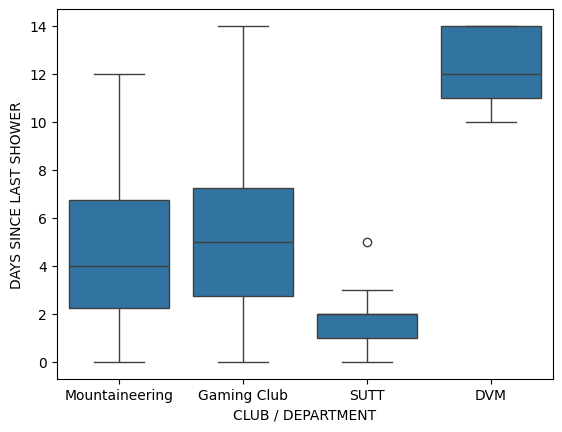

In [4]:
sns.boxplot(data=df, x='CLUB / DEPARTMENT', y='DAYS SINCE LAST SHOWER')

One outlier in SUTT, who could that be 👀

#### People in Mountaineering Club and SUTT are more likely to have a S/O

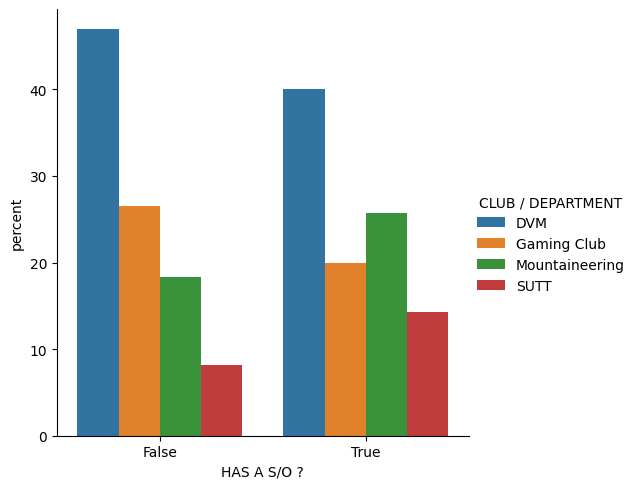

In [5]:
proportion_graph('HAS A S/O ?', 'CLUB / DEPARTMENT')

#### More treats given => More pizzeria expenditure

<Axes: xlabel='TREATS GIVEN', ylabel='PIZZERIA EXPENDITURE (annual)'>

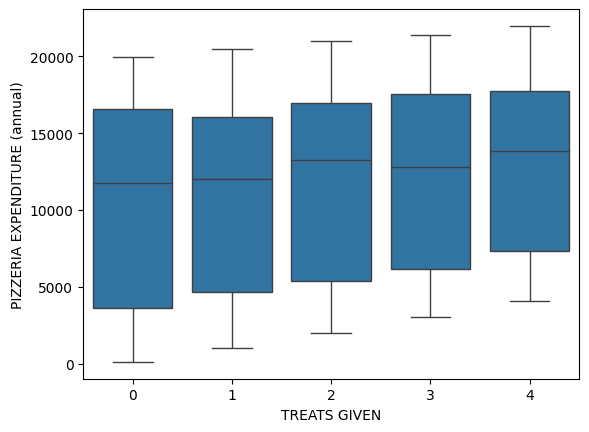

In [6]:
sns.boxplot(data=df,x='TREATS GIVEN', y='PIZZERIA EXPENDITURE (annual)')

#### Lite people on average have more grams per month, but there are a lot of Ghot outliers

<Axes: xlabel='CHARACTER', ylabel='GRAMS / MONTH'>

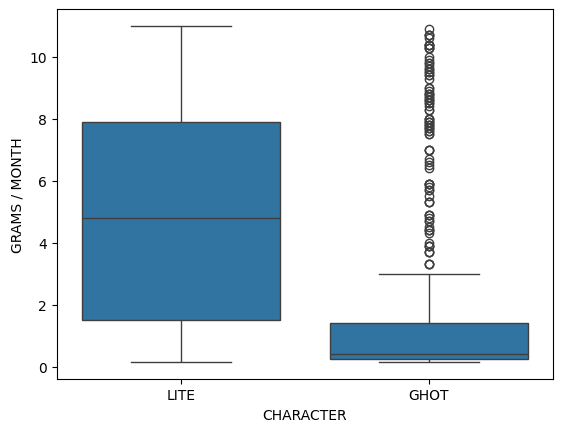

In [7]:
sns.boxplot(data=df, x='CHARACTER', y='GRAMS / MONTH')

#### Attending lectures has no effect on CGPA 😓

Text(0.5, 1.0, 'CGPA - 2')

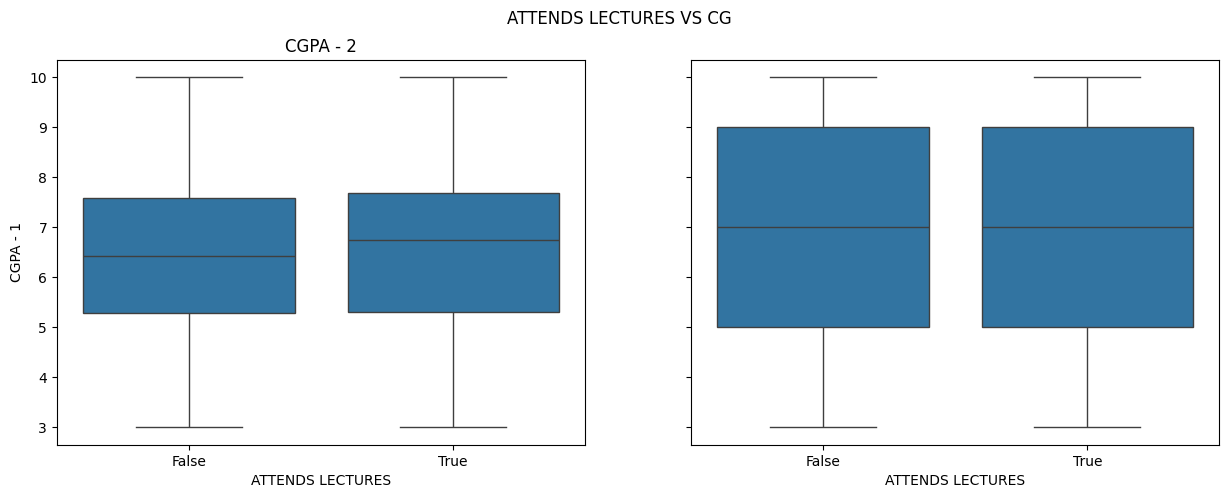

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('ATTENDS LECTURES VS CG')

sns.boxplot(ax=axes[0], data=df, x='ATTENDS LECTURES', y='CGPA - 1')
sns.boxplot( ax=axes[1], data=df, x='ATTENDS LECTURES', y='CGPA - 2')
axes[0].set_title("CGPA - 1")
axes[0].set_title("CGPA - 2")


#### Being a ghot barely has an effect on CGPA, ghots actually average lower 🥱

Text(0.5, 1.0, 'CGPA - 2')

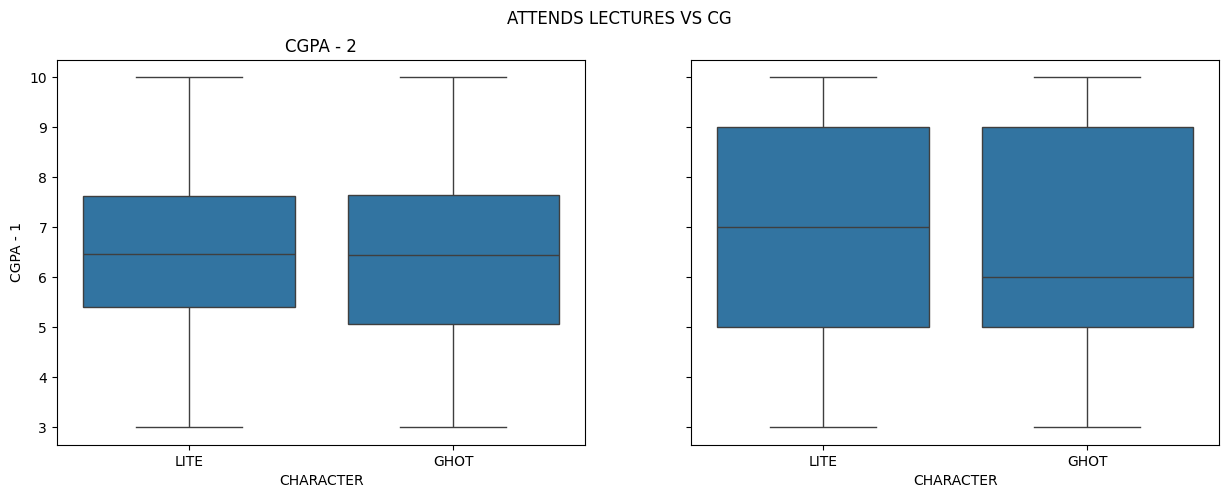

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('ATTENDS LECTURES VS CG')

sns.boxplot(ax=axes[0], data=df, x='CHARACTER', y='CGPA - 1')
sns.boxplot( ax=axes[1], data=df, x='CHARACTER', y='CGPA - 2')
axes[0].set_title("CGPA - 1")
axes[0].set_title("CGPA - 2")